In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.linalg import block_diag
from numpy.linalg import eigh

hbar = 1
m = 1

We write the Hamiltonian and the different states in the base $|g_1\rangle$, $|g_2\rangle$, $|e\rangle$. For now we suppose $\delta = 0$ but $\Delta \neq 0$ in the definition of the states.

In [3]:
def H_RWA(delta, Delta, wc, wp):
    return np.array([[-delta/2, 0, wc/2],
                     [0, delta/2, wp/2],
                     [wc/2, wp/2, Delta]])

def w_mean(wp, wc):
    return np.sqrt(wp**2 + wc**2)

def D(wc, wp):
    return (1/w_mean(wp, wc)) * np.transpose(np.array([wp, -wc, 0]))

#def plus():

#def minus():

#def B():
    return (1/np.sqrt(2)) * (plus() + minus())


Example of the optical lattice

In [4]:
def wc(x, k_rec, wc0):
    return wc0 * np.sin(k_rec*x)

In [5]:
x_array = np.linspace(-10, 10, 100)
wp = 1

eigvals = np.empty((len(x_array), 3), dtype=float)
eigvects = np.empty((len(x_array), 3, 3), dtype=complex)
for i, x in enumerate(x_array):
    eigvals[i,...], eigvects[i,...] = np.linalg.eigh(H_RWA(0, 0, wc(x, 0.10, 10), wp))

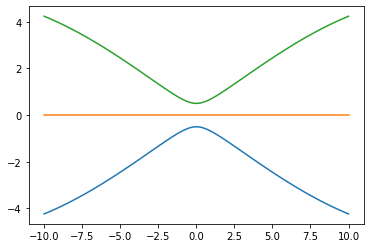

In [6]:
plt.plot(x_array, eigvals[:,0])
plt.plot(x_array, eigvals[:,1])
plt.plot(x_array, eigvals[:,2])

Résolution des énergies propres dans la base D + - à impulsion nulle, modèle simple à la Jendrzejewski avec wc linéaire

In [7]:
wp = 1
wc = lambda x: x
dx_wc = 1

In [8]:
D = np.array([[1, 0, 0]]).T
Plus = np.array([[0, 1, 0]]).T
Minus = np.array([[0, 0, 1]]).T

B = 1/np.sqrt(2) * (Plus + Minus)

A = lambda x: 1j * hbar * wp * dx_wc / w_mean(wp, wc(x))**2 * (B@D.T - D@B.T)

H = lambda x: A(x)@A(x)/(2*m) + hbar * w_mean(wp, wc(x)) * (Plus@Plus.T - Minus@Minus.T)


In [9]:
x_array = np.linspace(-3, 3, 100)

eigvals = np.empty((len(x_array), 3), dtype=float)
eigvects = np.empty((len(x_array), 3, 3), dtype=complex)
for i, x in enumerate(x_array):
    eigvals[i,...], eigvects[i,...] = np.linalg.eigh(H(x))
    


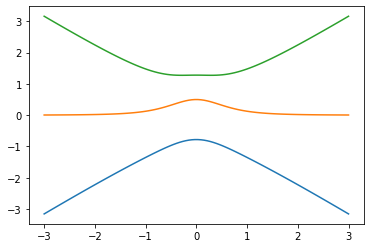

In [10]:
plt.plot(x_array, eigvals[:,0])
plt.plot(x_array, eigvals[:,1])
plt.plot(x_array, eigvals[:,2])

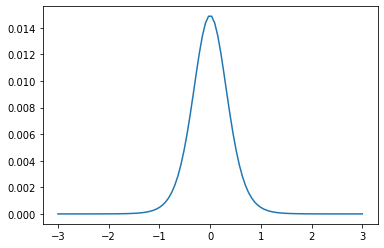

In [11]:
plt.plot(x_array, np.square(np.abs(eigvects[:,2,2])))

In [12]:
eigvects[50,...]

array([[ 0.        +0.j,  1.        +0.j, -0.        +0.j],
       [ 0.1219156 +0.j,  0.        +0.j, -0.99254047+0.j],
       [-0.99254047+0.j,  0.        +0.j, -0.1219156 +0.j]])

Résolution de l’équation de Schrodinger pour un potentiel harmonique

In [116]:
wp = 2
wc = lambda x: 2 *x
dx_wc = 1

delta = 0
Delta = 0

wt = 1
V_analytical = lambda x: 1/2 * wt**2 * x**2

In [117]:
x_min = -4
x_max = 4
N = 400
delta_x = (x_min - x_max)/(N-1)
x_array = np.linspace(x_min, x_max, N)

# for now m_e = 1 and hbar = 1

p_ext = -1j * hbar / (2*delta_x) * (np.diag(np.ones((N-1,), dtype=float), k=1)
                                - np.diag(np.ones((N-1,), dtype=float), k=-1))

p = block_diag(p_ext, p_ext, p_ext)

K_ext = - hbar**2 / (2*m * delta_x**2) * (np.diag(-2*np.ones((N,), dtype=float), k=0)
                                          + np.diag(np.ones((N-1,), dtype=float), k=1)
                                          + np.diag(np.ones((N-1,), dtype=float), k=-1))

K = block_diag(K_ext, K_ext, K_ext)

zeros =  np.zeros((N, N), dtype = complex)
identity = np.eye(N, dtype = complex)
wc_diag = np.diag([wc(x) for x in x_array])

g1_g1 = block_diag(identity, zeros, zeros)

g2_g2 = block_diag(zeros, identity, zeros)

e_e = block_diag(zeros, zeros, identity)

wc_over2_g1_e = np.block([[zeros, zeros, wc_diag],
                 [zeros, zeros, zeros],
                 [zeros, zeros, zeros]])

wc_over2_e_g1 = wc_over2_g1_e.T

g2_e = np.block([[zeros, identity, zeros],
                 [zeros, zeros, zeros],
                 [zeros, zeros, zeros]])

e_g1 = g1_e.T
e_g2 = g2_e.T

U = delta/2 * (g2_g2 - g1_g1) + Delta * e_e + (wc_over2_g1_e + wc_over2_e_g1) + wp/2 * (g2_e + e_g2)

V_ext = np.diag([V_analytical(x) for x in x_array])
V = block_diag(V_ext, V_ext, V_ext)

H = K + V + hbar*U

In [118]:
H.shape

(1200, 1200)

In [119]:
eigvals, eigvects = eigh(H)

In [120]:
for i in range(1):
    plt.plot(x_array, np.diag(V_ext))
    plt.plot(x_array, 100*(np.square(np.abs(eigvects[:N,i])) + np.square(np.abs(eigvects[N:2*N,i])) + np.square(np.abs(eigvects[2*N:,i]))) + eigvals[i])

In [91]:
matplotlib.rcsetup.interactive_bk

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo']